<a href="https://colab.research.google.com/github/AdindaRahajengSilviaPranesti/AdindaRahajengSP_PCVK/blob/main/MODUL_5_2141720158_AdindaRahajengSP_3ITI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**🌺ADINDA RAHAJENG SILVIA PRANESTI**
####**🌺2141720158-02**
####**🌺3ITI**
####**🌺PCVK_MODUL5**

##**💻TUGAS PRAKTIKUM💻**
**1. Make a Gamma Correction according to the following instructions**
- This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value
will be set by asking for input from the user . Below is the code to request value input from the
user. Continue the code by creating an image with gamma correction according to the formula
given.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


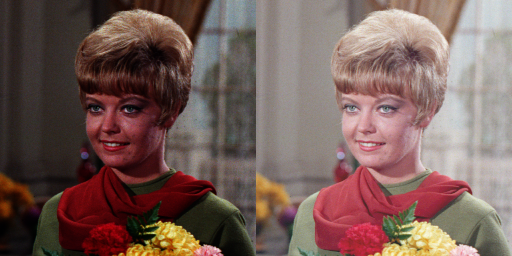

In [6]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Create Image Depth Simulation**
- This experiment is used as a simulation of the image quantization process. In image
quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel,
the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel,
the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color
is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only
manipulates colors so that the number of colors matches their depth. For the 7-bit case,
two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-
bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at
7-bit, etc.

 Bit Depth pada Citra 
---------------------------------
Masukkan nilai Bit Depth: 1


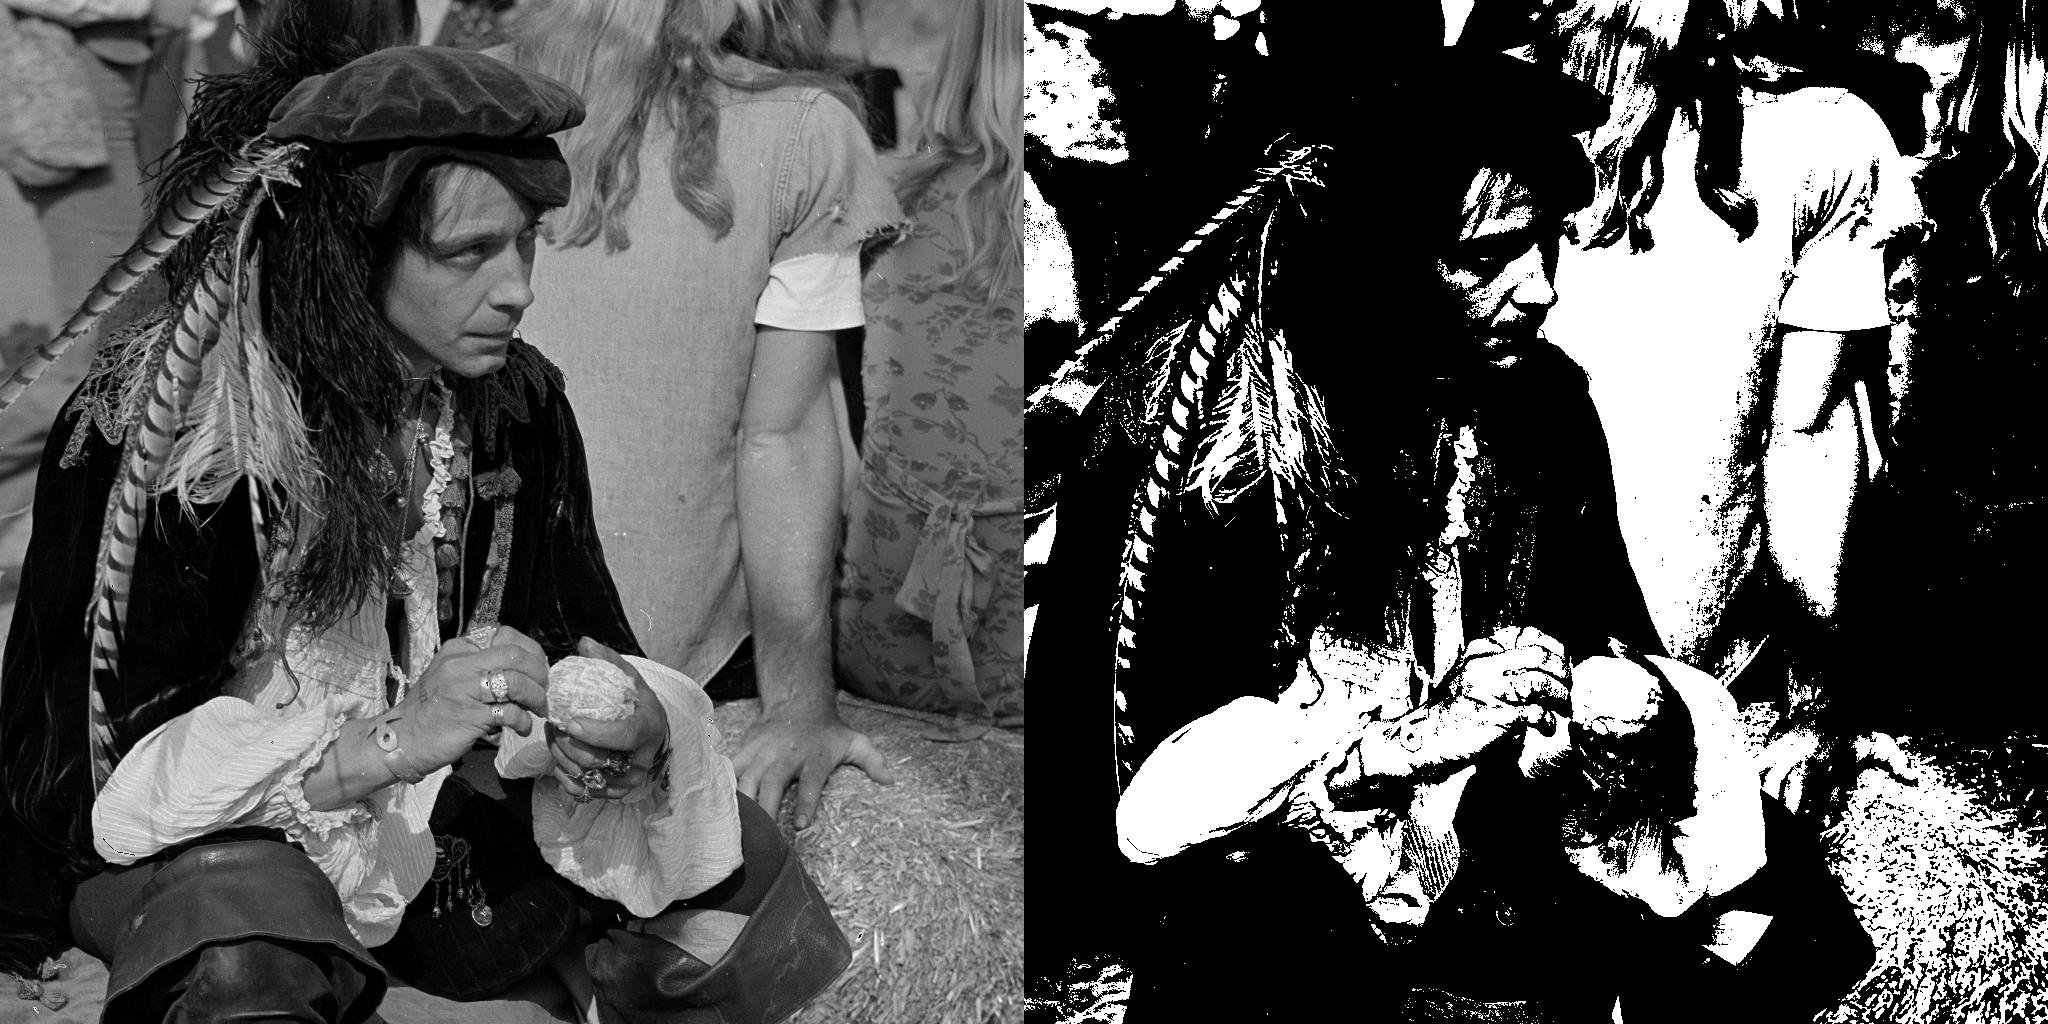

In [9]:
original = cv.imread('/content/drive/MyDrive/PCVK/male.tiff')

print(' Bit Depth pada Citra ')
print('---------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)


**3. Create the Average Denoising module**
- Create an average denoising module according to the formula given in the previous section.
Original images are provided at /images/galaxy.jpg .
100 Images with Gaussian Noise are provided at /images/noises/*.jpg
You can use the following code to read all the images in one folder, use the glob module (
import glob ).

```
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
n= cv.imread(img)
cv_img.append(n)
```
- By using the code above, all you have to do is call the image in the folder using cv_img [0], cv_img
[1], and so on.
- Record the PSNR results in the following table. From the results you have recorded, write down
your conclusions:

In [10]:
import cv2
import numpy as np
import glob

# Function to compute PSNR (Peak Signal-to-Noise Ratio)
def compute_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive//PCVK/galaxy.jpg')

# Create a list to store the noisy images
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Initialize an array to store denoised images
denoised_images = []

# Apply average denoising
for noisy_image in cv_img:
    # Perform average denoising
    denoised = cv2.blur(noisy_image, (5, 5))  # You can adjust the kernel size (e.g., (3, 3)) as needed
    denoised_images.append(denoised)

# Calculate and record PSNR values
psnr_results = []
for denoised_image in denoised_images:
    psnr = compute_psnr(original_image, denoised_image)
    psnr_results.append(psnr)

# Print PSNR results and compute average PSNR
print("PSNR Results:")
print("-" * 15)
for i, psnr in enumerate(psnr_results):
    print(f"Noise {i + 1}: PSNR = {psnr:.2f} dB")

average_psnr = np.mean(psnr_results)
print(f"\nAverage PSNR = {average_psnr:.2f} dB")


PSNR Results:
---------------

Average PSNR = nan dB


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
